In [297]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

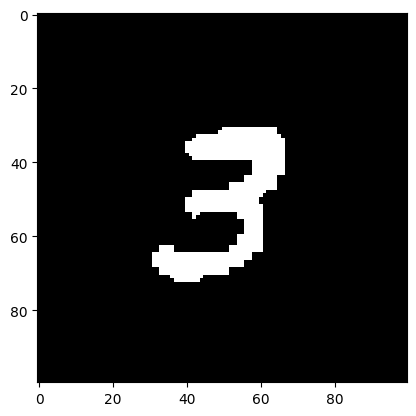

In [298]:
img = cv2.imread('/content/three.png',0)
img = cv2.resize(img,(100,100))
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img, cmap = 'gray')

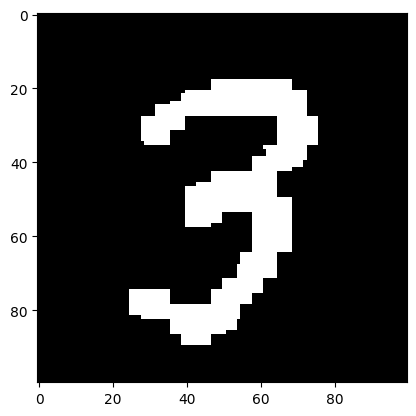

In [299]:
img1 = cv2.imread('/content/3.jpg',0)
img1 = cv2.resize(img1,(100,100))
_, img1 = cv2.threshold(img1, 120, 255, cv2.THRESH_BINARY)
plt.imshow(img1, cmap = 'gray')

In [300]:
for i, row in enumerate(img):
      for j, value in enumerate(row):
          if value != 0:
              start_point = (i, j)
              break

In [301]:
for i, row in enumerate(img1):
      for j, value in enumerate(row):
          if value != 0:
              start_point1 = (i, j)
              break

In [302]:
directions = [0, 1, 2, 3, 4, 5, 6, 7]
change_i = [1, 1, 0, -1, -1, -1, 0, 1]
change_j = [0, 1, 1, 1, 0, -1, -1, -1]

In [303]:
border = []
chain = []
curr_point = start_point
for direction in directions:
    new_point = (start_point[0]+change_i[direction], start_point[1]+change_j[direction])
    if img[new_point] != 0:
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

In [304]:
count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        new_point = (curr_point[0]+change_i[direction], curr_point[1]+change_j[direction])
        if img[new_point] != 0:
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

In [305]:
border1 = []
chain1 = []
curr_point1 = start_point1
for direction in directions:
    new_point1 = (start_point1[0]+change_i[direction], start_point1[1]+change_j[direction])
    if img[new_point1] != 0:
        border1.append(new_point1)
        chain1.append(direction)
        curr_point1 = new_point1
        break

In [306]:
count = 0
while curr_point1 != start_point1:
    #figure direction to start search
    b_direction = (direction + 5) % 8
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        new_point1 = (curr_point1[0]+change_i[direction], curr_point1[1]+change_j[direction])
        if img[new_point1] != 0:
            border1.append(new_point1)
            chain1.append(direction)
            curr_point1 = new_point1
            break
    if count == 1000: break
    count += 1

In [307]:
print(chain)

[2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 4, 3, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 2, 2, 4, 4, 4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 7, 6, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 7, 6, 0, 7, 6, 6, 6, 0, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 7, 6, 0, 0, 0, 2, 1, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 7, 6, 0, 0, 7, 6, 0, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 4, 6, 6, 6, 0, 7, 6, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1]


In [308]:
print(chain1)

[]


Text(0.5, 1.0, 'Border')

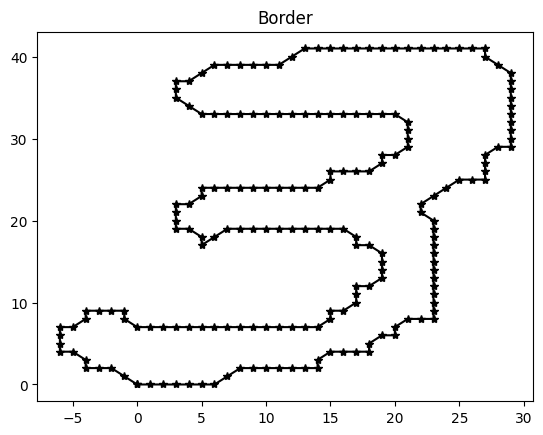

In [278]:
curr_pos = (0, 0)
directions = [(0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (-1, -1)]
boundary = [curr_pos]
for direction in chain:
    curr_pos = (curr_pos[0] + directions[direction][0], curr_pos[1] + directions[direction][1])
    boundary.append(curr_pos)

plt.plot(*zip(*boundary), marker='*', color='black', linestyle='-')
plt.title("Border")

Text(0.5, 1.0, 'Border')

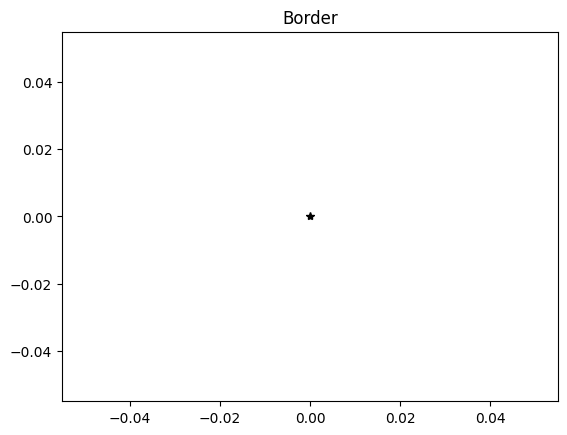

In [279]:
curr_pos = (0, 0)
directions = [(0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (-1, -1)]
boundary1 = [curr_pos]
for direction in chain1:
    curr_pos = (curr_pos[0] + directions[direction][0], curr_pos[1] + directions[direction][1])
    boundary1.append(curr_pos)

plt.plot(*zip(*boundary1), marker='*', color='black', linestyle='-')
plt.title("Border")

In [280]:
print(len(chain))

194


Text(0.5, 1.0, 'Border')

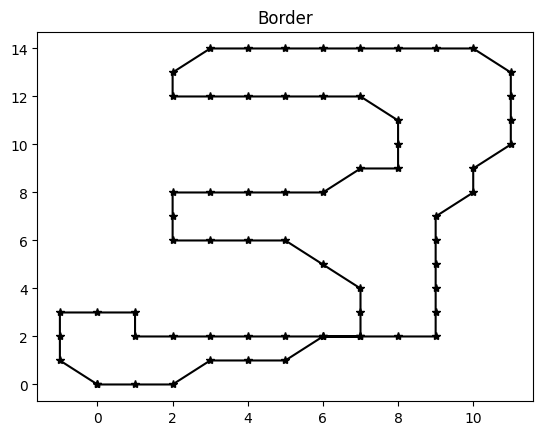

In [281]:
chn = []
for i in range(0,len(chain),len(chain)//50):
  chn.append(chain[i])

curr_pos = (0, 0)
directions = [(0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (-1, -1)]
bdry = [curr_pos]
for direction in chn:
    curr_pos = (curr_pos[0] + directions[direction][0], curr_pos[1] + directions[direction][1])
    bdry.append(curr_pos)

plt.plot(*zip(*bdry), marker='*', color='black', linestyle='-')
plt.title("Border")

In [282]:
print(len(chn))

65
